<a href="https://colab.research.google.com/github/anachavesv8/Projeto_04_MD_Extra/blob/main/Projeto_4_MD_Extra_Recomendacao_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 4 - Recomendação de vinhos - Wine Reviews

# Wine Reviews - Kaggle

O conjunto de dados Wine Reviews possui o comentário e a nota dada por cada especialista sobre diversos vinhos. O autor se inspirou para fazer este conjunto de dados após assistir Somm, um documentário sobre mestres sommeliers de vinho.

# Preparação do ambiente

* Para este projeto, acessem o link do Kaggle e, logo abaixo, cliquem em "Download". Caso você não tenha uma conta no Kaggle, crie uma e retorne para esse ponto para realizar o download. Descompacte o arquivo.
* Crie o projeto no Github
* ~Use o cookiecutter para organizar o projeto~
* Leia todo o material disponibilizado no Kaggle para entender esses dados
* Caso precise, leia outros projetos que usaram este mesmo conjunto de dados

# Projeto

1. Use os passos do Crisp-DM para desenvolver o projeto.
2. Observe os dados e busque levantar observações importantes, tais como:
  3. Qual vinho é o mais caro? E o mais barato?
  4. Qual especialista avaliou mais vinhos? Qual a sua nota média?
  5. Qual região possui os vinhos com as maiores avaliações? E qual possui os vinhos mais baratos?
6. Faça o sistema de recomendação
7. Escreva o relatório
8. Disponibilize o repositório do seu projeto

# Exercícios

 

Separe o notebook entre analise exploratória, construção do sistema de recomendação e relatório.
(3 pontos)

1. Análise exploratória: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.
(3 pontos)

In [39]:
#Instalando a biblioteca
!pip install spacy

import spacy
import spacy.cli

spacy.cli.download("en_core_web_sm")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [40]:
import numpy as np
import pandas as pd
import re

import sklearn

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

vinhos  = pd.read_csv('/content/drive/MyDrive/PYTHON/modulo extra projeto 4/winemag-data-130k-v2.csv')

In [41]:
vinhos

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [42]:
vinhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


Colunas presentes: 

* *Unnamed:	- coluna vazia, sera excluida.* 
* country - País
* description	 - descrição
* designation	- designação - será excluida, não achei relevante
* points - pontos	
* price	province	- Preço da provincia
* region_1	- região 1 - será excluida por ter muitos valores nulos
* *region_2	- região 2 - será excluido, por ter muitos valores nulos
* taster_name	- nome do provador - excluido para o dataset de recomendação, mas será utilizado no dataset original para responder as perguntas.
* *taster_twitter_handle	- Twitter do provador (coluna será excluida)*
* title	- Titulo do vinho
* variety	winery - Variedade Vinicola

Este dataset, é a relação dos vinhos e a classificação dos provadores, referente ao documentario somm (2012).

Irei remover os valores nulos, excluir as colunas que não fazem referencia ao processo.



In [43]:
vinhos_2 = vinhos.drop(['Unnamed: 0', 'region_2', 'taster_twitter_handle', 'taster_name', 'designation', 'region_1' ], axis=1)

In [44]:
df = vinhos_2.copy() 
df.isna().sum().loc[df.isna().sum()>0].sort_values()

variety        1
country       63
province      63
price       8996
dtype: int64

Corrigindo os valores nulos

In [45]:
vinhos_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


Verificando os valores médio do preço, e colocando como valor nas NaN.

In [46]:
vinhos_2['price'].median()

25.0

In [47]:
vinhos_2.loc[pd.Series(vinhos_2.price.isna()), 'price'] = 25

Excluindo os demais valores nulos.

In [48]:
vinhos_2.dropna(how='all')

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,25.0,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Oregon,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Alsace,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Alsace,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [49]:
df = vinhos_2.copy() 
df.isna().sum().loc[df.isna().sum()>0].sort_values()

variety      1
country     63
province    63
dtype: int64

Na variety, irei descobrir a moda e colocarei o valor nulo.

In [50]:
vinhos_2['variety'].mode()

0    Pinot Noir
dtype: object

In [51]:
vinhos_2.loc[pd.Series(vinhos_2.variety.isna()), 'variety'] = 'Pinot Noir'

Verificando o que permanece nulo.

In [52]:
df = vinhos_2.copy() 
df.isna().sum().loc[df.isna().sum()>0].sort_values()

country     63
province    63
dtype: int64

Excluindo o restante.

In [53]:
vinhos_2.dropna(inplace=True)

In [54]:
vinhos_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129908 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129908 non-null  object 
 2   points       129908 non-null  int64  
 3   price        129908 non-null  float64
 4   province     129908 non-null  object 
 5   title        129908 non-null  object 
 6   variety      129908 non-null  object 
 7   winery       129908 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.9+ MB


In [55]:
#verificando a estatistica desde dataset
vinhos_2.describe()

,points,price
count,129908.000000,129908.000000
mean,88.447047,34.650945
std,3.040066,39.672922
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,25.000000
75%,91.000000,40.000000
max,100.000000,3300.000000


# Qual o vinho mais caro?


In [56]:
#Utilizando os valores do describe.
maior = vinhos_2.loc[vinhos_2['price']==3300]
maior

,country,description,points,price,province,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


# Qual o Vinho mais barato? Neste caso foram varios.

In [57]:
#Utilizando os valores do describe.
barato = vinhos_2.loc[vinhos_2['price']==4]
barato

,country,description,points,price,province,title,variety,winery
1987,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis
20484,US,"Fruity, soft and rather sweet, this wine smell...",85,4.0,California,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote
29553,Argentina,"Crimson in color but also translucent, with a ...",84,4.0,Mendoza Province,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass
31530,US,"Packaged in a cute yellow recyclable Tetrapak,...",84,4.0,California,Bandit NV Chardonnay (California),Chardonnay,Bandit
59507,US,"Sweet and fruity, this canned wine feels soft ...",83,4.0,California,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,Pam's Cuties
61768,Spain,This opens with standard cherry and berry arom...,84,4.0,Levante,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal
64590,US,"There's a lot going on in this Merlot, which i...",86,4.0,California,Bandit NV Merlot (California),Merlot,Bandit
110255,US,"A good everyday Merlot, dry and rich in tannin...",84,4.0,California,Bandit NV Merlot (California),Merlot,Bandit
112919,Spain,"Nice on the nose, this has a leafy note and a ...",84,4.0,Levante,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal
117303,Spain,"Tropical fruit and citrus aromas aren't bad, b...",82,4.0,Central Spain,Felix Solis 2012 Flirty Bird White (Vino de la...,White Blend,Felix Solis


# Quais Vinhos obtiveram a nota maxima?

In [58]:
melhor = vinhos_2.loc[vinhos_2['points']==100]
melhor

,country,description,points,price,province,title,variety,winery
345,Australia,This wine contains some material over 100 year...,100,350.0,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,Italy,Thick as molasses and dark as caramelized brow...,100,210.0,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,France,This is a fabulous wine from the greatest Cham...,100,259.0,Champagne,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,Italy,"A perfect wine from a classic vintage, the 200...",100,460.0,Tuscany,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
42197,Portugal,This is the latest release of what has long be...,100,450.0,Douro,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
45781,Italy,"This gorgeous, fragrant wine opens with classi...",100,550.0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
45798,US,Tasted in a flight of great and famous Napa wi...,100,200.0,California,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
58352,France,"This is a magnificently solid wine, initially ...",100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
89728,France,This latest incarnation of the famous brand is...,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,France,This new release from a great vintage for Char...,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


E o mais bem avaliado com o valor mais baixo:

In [59]:
melhor.min()

country                                                Australia
description    A hugely powerful wine, full of dark, brooding...
points                                                       100
price                                                       80.0
province                                                Bordeaux
title          Avignonesi 1995 Occhio di Pernice  (Vin Santo ...
variety                                 Bordeaux-style Red Blend
winery                                                Avignonesi
dtype: object

O Mais bem avaliado mais caro.

In [60]:
melhor.max()

country                                                       US
description    This wine dazzles with perfection. Sourced fro...
points                                                       100
price                                                     1500.0
province                                              Washington
title                    Verité 2007 La Muse Red (Sonoma County)
variety                                                    Syrah
winery                                                    Verité
dtype: object

# Qual especialista avaliou mais vinhos? Qual a sua nota média?
* Roger Voss avaliou 25.514 vinhos

In [61]:
vinhos['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [62]:
#Nota média do RogerVoss
nota = vinhos.loc[vinhos['taster_name']=='Roger Voss']
nota.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0    64480.295524
points           88.708003
price            38.649960
dtype: float64

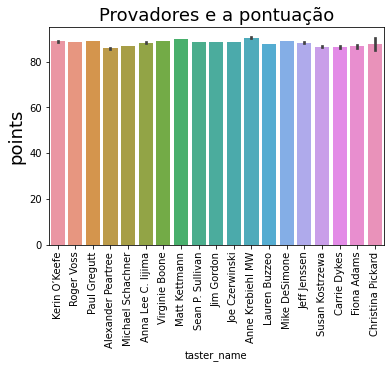

In [63]:
import seaborn as sns

media = sns.barplot(data=vinhos, x='taster_name', y='points');
media.set_title('Provadores e a pontuação', fontsize=18)
media.set_ylabel('points', fontsize=18)
media.set_xticklabels(media.get_xticklabels(),rotation = 90);

In [64]:
# ax = sns.boxplot(y=vinhos_2["points"], x=vinhos_2["title"]);

# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

# Qual região possui os vinhos com as maiores avaliações? 

In [65]:
import plotly.express as px

grafico = px.histogram(melhor, x='title', color='country')
grafico.show()

Conforme apresentado no gráfico acima, o País com mais vinhos avaliados com a nota máxima são da França.

# E qual possui os vinhos mais baratos?

In [66]:
grafico2 = px.histogram(barato, x='title', color='country')
grafico2.show()

Conforme representado acima, o País com mais vinhos baratos é os Estados Unidos.

2. Sistema de recomendação: faça a construção de seu sistema de recomendação
(4 pontos)

Acionamento do Modelo de transformação da coluna de texto, irei usar a coluna de descrição do vinho.

In [67]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
mlb = MultiLabelBinarizer()
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
tfidf_transformer = TfidfTransformer()

In [69]:
contagem = vinhos_2.description.value_counts()
manter = contagem[contagem > 3]
vinhos_2 = vinhos_2[vinhos_2.description.isin(manter.index)]

titulos = vinhos_2.title
descricao  = vinhos_2.description.apply(lambda x : [n.strip() for n in x.split(',')]).tolist()

In [70]:
descricao

[]

In [71]:
mlb.fit(descricao)
y = mlb.transform(descricao)

In [72]:
# funcao para tratar cada palavra e remover stopwords
def processamento(tokens):
    
    token_processado = []
    for token in tokens:
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        
        if token not in stop_words:
            token = stemmer.stem(token)
            token_processado.append(token)
        
    return token_processado

documentos = []
for descricao in descricao:
    
    # expressao regular para remover pontuacoes do texto
    descricao = re.sub(r'[^\w\s]','', descricao)
    tokens = processamento(word_tokenize(descricao))
    
    documentos.append(' '.join(tokens))

# X_train_counts = vectorizer.fit_transform(documentos)
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# X = X_train_tfidf

In [73]:
documentos

[]

In [74]:
# funcao para tratar cada palavra e remover stopwords
documentot = []
for titulos in titulos:
    
    # expressao regular para remover pontuacoes do texto
    descricao = re.sub(r'[^\w\s]','', titulos)
    tokens = processamento(word_tokenize(titulos))
    
    documentot.append(' '.join(tokens))

# X_train_counts = vectorizer.fit_transform(documentos)
# X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# X = X_train_tfidf

In [75]:
def criar_matrix_mapeamento(avaliacoes):
      
    N = len(vinhos_2['description'].unique())
    M = len(vinhos_2['title'].unique())
      
    # Mapear os ids com indices
    descricao = dict(zip(np.unique(vinhos_2['description']), list(range(N))))
    vinhos_dicionario   = dict(zip(np.unique((vinhos_2['title']), list(range(M))))
      
    # Mapear indices para ids
    vinho_3 = dict(zip(list(range(N)), np.unique(vinhos_2['description'])))
    vinho_inv_dicionario = dict(zip(list(range(M)), np.unique((vinhos_2['title'])))
      
    vinho_desc_indices = [descricao[i] for i in vinhos_2['description']]
    title_indices   = [vinhos_dicionario[i] for i in (vinhos_2['title']]
  
    X = csr_matrix((vinhos_2["point"], (title_indices, vinho_desc_indices)), shape=(M, N))
      
    return X, vinho_desc, vinho_inv_dicionario

SyntaxError: ignored

In [ ]:
def recomendacoes(filme_id, X, k, filmes_titulos, metrica='cosine', mostrar_distancia=False):
      
    vizinhos_ids = []
    
    filme_indice = filmes_dicionario[filme_id]
    filme_vetor = X[filme_indice]
    
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metrica)
    kNN.fit(X)
    filme_vetor = filme_vetor.reshape(1,-1)
    neighbour = kNN.kneighbors(filme_vetor, return_distance=mostrar_distancia)
    for i in range(0,k):
        n = neighbour.item(i)
        vizinhos_ids.append(filmes_inv_dicionario[n])
    vizinhos_ids.pop(0)
    
    recomendacoes = [filmes_titulos[idx] for idx in vizinhos_ids]
    
    return recomendacoes

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    # dicionario de ids e titulos de filmes
filmes_titulos = dict(zip(metadados['movieId'], metadados['title']))

# construcao da matriz
X, filmes_dicionario, filmes_inv_dicionario = criar_matrix_mapeamento(avaliacoes)

In [ ]:
# por exemplo o id 1 é 'Toy Story'
recomendacoes(filme_id = 1, X=X, k=10, filmes_titulos=filmes_titulos)

 3. ** Relatório**: construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:

* Imagine que você possui uma startup e este é o primeiro relatório apresentará
Coloque o nome do seu produto
* Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
* Coloque gráficos e frases para sustentar seus argumentos
* Mostre as soluções do mercado
* Escreva sobre a sua solução e por que ela é a melhor



---
# RELATÓRIO


Nome produto: Recomendação de vinhos - Sommelier NoVinho

   O vinho sempre esteve de alguma forma vinculado à história do homem, seja por ser uma bebida com sabor e personalidade próprios ou pelos
benefícios que traz à saúde.

   Um Mundo que envolve aroma, paladar, aspecto visual, experiência afetiva e, claro seu gosto pessoal ao degustar vinho.

  Essa prática é tão séria que existe certificação, um sommelier master é uma pessoa que passou por quatro níveis de treinamento de sommelier para obter um Diploma de MS . Este diploma é entregue a candidatos selecionados pelo Tribunal de Mestres Sommeliers , que foi fundado em 1977.
  Os master sommeliers precisam estar familiarizados com uma variedade de vinhos.

 * E será que com dados dew vinhos avaliados pelo sommilers, conseguiriamos criar um sistema de recomendação de vinhos, conforme o gosto da pessoa?*

  Analisando os dados disponibilizados e com eles verificamos como poderiamos fazer um sistema de recomendação.


  Os dados foram extraídos do WineEnthusiast durante a semana de 15 de junho de 2017. 

**Graficos dos resultados do sistema de recomendações - métricas**

Um modelo no mercado ja utilizado é so site **9Wines**, o que utiliza o mesmo método das recomendações da netflix.
 Outro Modelo existente é o **Vivino** é um aplicativo de escaneamento de rótulos. Com ele, é possível encontrar informações sobre os 13 milhões de vinhos presentes em sua base de dados. 
**Cellar Tracker** é uma plataforma funciona como um sistema de catalogação online, na qual é possível registrar novos rótulos, rastrear garrafas já existentes, além de consultar informações sobre os seus vinhos favoritos e mais estimados. Entre outros aplicativos.

Como essas aplicativos em grande sua maioria utiliza informações dos rótulos e não o gosto do cliente, o que se aproxima do nosso método é do site 9wines.

Com base nos resultados obtidos no sistema de recomendações, conforme o gosto do cliente, e não em sua pontuação, ele é recomendando pela descrição e títulos apresentados no dataset, nem todas as pessoas possuem o mesmo paladar, nem sempre o melhor vinho é o mais caro, e poder diferenciar esses gostos, e trazer mais informações sobre o vinho em questão, sua pontuação, provincia, variedade, ano, Pais e o preço, é o grande diferencial desde metodo.

Exemplo de aplicação do metodo, oo entrar no site da loja de vinhos, o cliente responde um breve questionário com algumas perguntas sobre as preferências de vinho e aromas que ajudam o algoritmo de recomendação para indicar e recomendar os rótulos mais adequados ao perfil de cada pessoa.

É um método que podera ser mais explorado e aperfeiçoado com maior dedicação no futuro.


FONTES:


* **Conheça o sistema inédito para recomendação de vinhos inspirado na Netflix**.<http://noticiasenegocios.com.br/2013/05/conheca-o-sistema-inedito-para-recomendacao-de-vinhos-inspirado-na-netflix/>. Acessado 17/07/2022.


* **5 aplicativos de vinho para os enófilos de plantão**. <https://www.divvino.com.br/blog/aplicativos-de-vinho/>. Acessado 17/07/2022.


* Fellipe Fernando,** Sistema de recomendação de vinhos**. <https://medium.com/@fellipefernando_34405/ramón-sistema-de-recomendação-de-vinhos-1a871a4b8d86>. Acessado em 13/07/2022.